In [ ]:
list_N_atoms = [108, 256, 500, 864, 1372, 2048]
def build_nomefile(N_atoms):
    return f"../../data/fcc100a{N_atoms}.txt"

# Calcolo senza raggio di cutoff

In [16]:
list_potentials_no_cutoff = []

In [17]:
from Crystal import Crystal

for N_atoms in list_N_atoms:
    nomefile = build_nomefile(N_atoms)
    cristallo_no_cutoff = Crystal.from_file(nomefile)
    cristallo_no_cutoff.find_neighbours(R_C=100) # raggio di cutoff non ancora fornito
    potenziale = cristallo_no_cutoff.calculate_potential()
    list_potentials_no_cutoff.append(potenziale)

    # Stampo
    print(f"N_atoms: {N_atoms}, Potential: {potenziale}, Potential/N_atoms: {potenziale/N_atoms}" )
    '''
    # Salvo in un file
    with open(f"output/potenziale.txt", "a") as f:
        f.write(f"{N_atoms} {potenziale} {potenziale/N_atoms}\n")
    '''

N_atoms: 108, Potential: -198.65611969102676, Potential/N_atoms: -1.8394085156576552
N_atoms: 256, Potential: -532.4800095249336, Potential/N_atoms: -2.080000037206772
N_atoms: 500, Potential: -1117.0432554231172, Potential/N_atoms: -2.234086510846234
N_atoms: 864, Potential: -2022.6746505467845, Potential/N_atoms: -2.3410586233180375
N_atoms: 1372, Potential: -3319.7106933884756, Potential/N_atoms: -2.419614208009093
N_atoms: 2048, Potential: -5078.491483296492, Potential/N_atoms: -2.4797321695783654


Plot dei risultati

# Ripeto con raggio cutoff $R_c=3$

In [18]:
potenziale_cutoff_3 = []

In [ ]:
for N_atoms in list_N_atoms:
    nomefile = build_nomefile(N_atoms)
    cristallo_cutoff_3 = Crystal.from_file(nomefile)
    cristallo_cutoff_3.find_neighbours(R_C=3) # raggio di cutoff = 3 
    potenziale = cristallo_cutoff_3.calculate_potential()
    potenziale_cutoff_3.append(potenziale)

    # Stampo
    print(f"N_atoms: {N_atoms}, Potential: {potenziale}, Potential/N_atoms: {potenziale/N_atoms}" )
    '''
    # Salvo in un file il potenziale
    with open(f"output/cutoff_3/potenziale_cutoff_3.txt", "w") as f:
        f.write(f"{N_atoms} {potenziale} {potenziale/N_atoms}\n")
    '''
    
    vec_forze = cristallo_cutoff_3.calculate_forces()

    '''
    # Salvo in un file le forze
    for i, forze in enumerate(vec_forze):
        with open(f"output/cutoff_3/forze_cutoff_3_{N_atoms}.txt", "a") as f:
            f.write(f"{i} {forze[0]} {forze[1]} {forze[2]}\n")
    '''

N_atoms: 108, Potential: -154.7957616328464, Potential/N_atoms: -1.4332940891930221
N_atoms: 256, Potential: -404.5329237338181, Potential/N_atoms: -1.580206733335227
N_atoms: 500, Potential: -835.8971128173928, Potential/N_atoms: -1.6717942256347855
N_atoms: 864, Potential: -1498.422972605782, Potential/N_atoms: -1.7342858479233587
N_atoms: 1372, Potential: -2441.645146821994, Potential/N_atoms: -1.7796247425816283
N_atoms: 2048, Potential: -3715.098279189283, Potential/N_atoms: -1.814012831635392


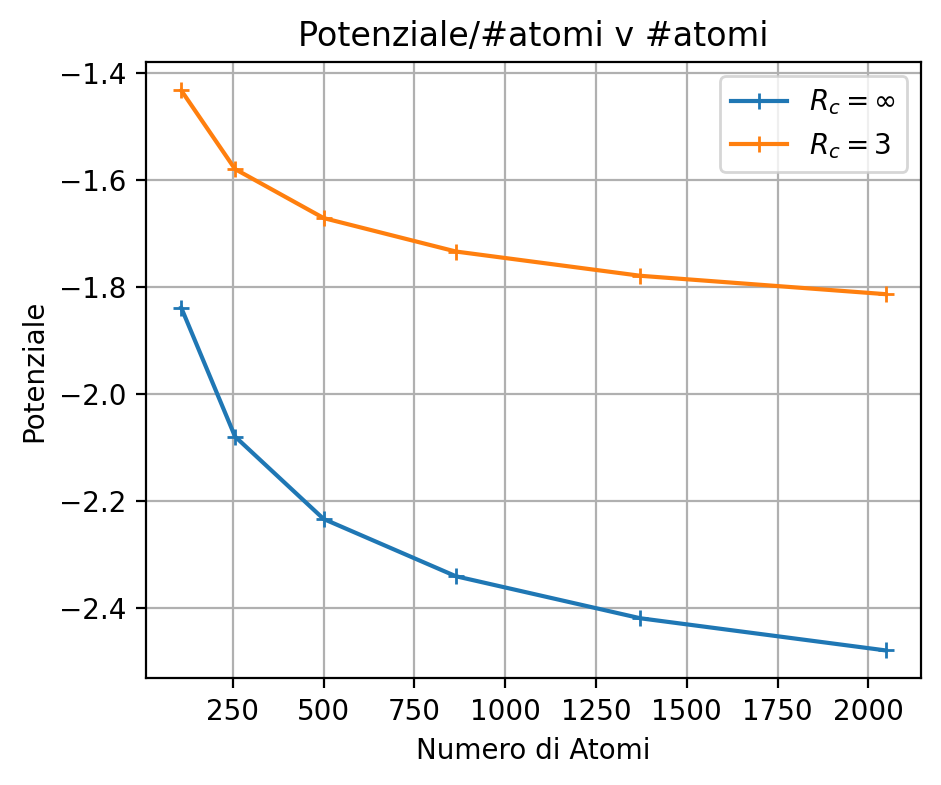

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,4), dpi=200)
plt.plot(list_N_atoms, np.array(list_potentials_no_cutoff)/np.array(list_N_atoms), marker='+', label=r"$R_c=\infty$")
plt.plot(list_N_atoms, np.array(potenziale_cutoff_3)/np.array(list_N_atoms), marker='+', label=r"$R_c=3$")
plt.xlabel("Numero di Atomi")
plt.ylabel("Potenziale")
plt.title("Potenziale/#atomi v #atomi")
plt.legend()
plt.grid()
plt.show()